# Title #
How does heights, break point lose and the aces a tennis player gets in the match affects winning and losing on the grass court 

# Introduction #
The predictive question of our project is  “How does heights, break point loss and the aces a tennis player gets in the match affects winning and losing on the grass court ” based on the  Game results for Top 500 Players from 2017-2019 data set.  

Various factors affect winning and losing such as the height of the tennis player, number of aces served and break points lost in the match . Based on experience, the player who has better ability to serve aces in the match gets the upper hand in the competition as an immediate point is obtained before the opponent even touches the ball. A higher height in tennis can hit the ball at better angles and can serve faster. Breakpoint occurs when the player is one point away from winning a game and the opponent is serving, which can affect winning and losing. Only game results played on grass surfaces are chosen as it is the first ever surface the game was ever played on.  

# Preliminary Exploratory Data Analysis #

In [8]:
library(tidyverse)
library(repr)
library(tidymodels)
options(repr.matrix.max.rows = 6)

In [10]:
#Cleaned dataset that contains both testing and training

winner_tennis_data<-read_csv("atp2017-2019.csv")%>%
    filter(surface=="Grass")%>%
    select(winner_ht, w_ace, w_bpFaced, w_bpSaved)%>%
    na.omit()%>% #remove rows that contains NA
    mutate(w_bpLosed= w_bpFaced-w_bpSaved)%>%
    select(-w_bpFaced, -w_bpSaved)%>%
    rename(height=winner_ht,
          ace=w_ace,
          bpLosed=w_bpLosed)%>%
    add_column(result= as_factor("win"))  

loser_tennis_data<-read_csv("atp2017-2019.csv")%>%
    filter(surface=="Grass")%>%
    select(loser_ht, l_ace, l_bpFaced, l_bpSaved)%>%
    na.omit()%>% #remove rows that contains NA
    mutate(l_bpLosed=l_bpFaced-l_bpSaved)%>%
    select(-l_bpFaced, -l_bpSaved)%>%
    rename(height=loser_ht,
          ace=l_ace,
          bpLosed=l_bpLosed)%>%
    add_column(result= as_factor("lose"))

tennis_data<-bind_rows(winner_tennis_data,loser_tennis_data)%>%
    suppressWarnings()
tennis_data


Parsed with column specification:
cols(
  .default = col_double(),
  tourney_id = col_character(),
  tourney_name = col_character(),
  surface = col_character(),
  tourney_level = col_character(),
  winner_seed = col_character(),
  winner_entry = col_character(),
  winner_name = col_character(),
  winner_hand = col_character(),
  winner_ioc = col_character(),
  loser_seed = col_character(),
  loser_entry = col_character(),
  loser_name = col_character(),
  loser_hand = col_character(),
  loser_ioc = col_character(),
  score = col_character(),
  round = col_character()
)

See spec(...) for full column specifications.

Parsed with column specification:
cols(
  .default = col_double(),
  tourney_id = col_character(),
  tourney_name = col_character(),
  surface = col_character(),
  tourney_level = col_character(),
  winner_seed = col_character(),
  winner_entry = col_character(),
  winner_name = col_character(),
  winner_hand = col_character(),
  winner_ioc = col_character(),
  loser_seed 

height,ace,bpLosed,result
<dbl>,<dbl>,<dbl>,<fct>
183,4,1,win
183,3,3,win
185,6,0,win
⋮,⋮,⋮,⋮
188,9,4,lose
185,4,5,lose
188,7,1,lose


In [11]:
#Training and Testing Data Set
tennis_split <- initial_split(tennis_data, prop = 0.75, strata = result)
tennis_train <- training(tennis_split)
tennis_test <- testing(tennis_split) 

tennis_train

height,ace,bpLosed,result
<dbl>,<dbl>,<dbl>,<fct>
183,4,1,win
183,3,3,win
185,6,0,win
⋮,⋮,⋮,⋮
208,30,0,lose
188,9,4,lose
185,4,5,lose


In [12]:
#Summarization of our training data set
tennis_train_sum<- summarize(tennis_train, 
                      height_mean= mean(height),
                      ace_mean=mean(ace),
                      bpLosed_mean=mean(bpLosed))%>%
    add_column(num_of_wins=nrow(tennis_train[tennis_train$result=="win",]),
               num_of_loses=nrow(tennis_train[tennis_train$result=="lose",]))


tennis_train_sum

height_mean,ace_mean,bpLosed_mean,num_of_wins,num_of_loses
<dbl>,<dbl>,<dbl>,<int>,<int>
187.1673,9.063492,2.29304,443,376


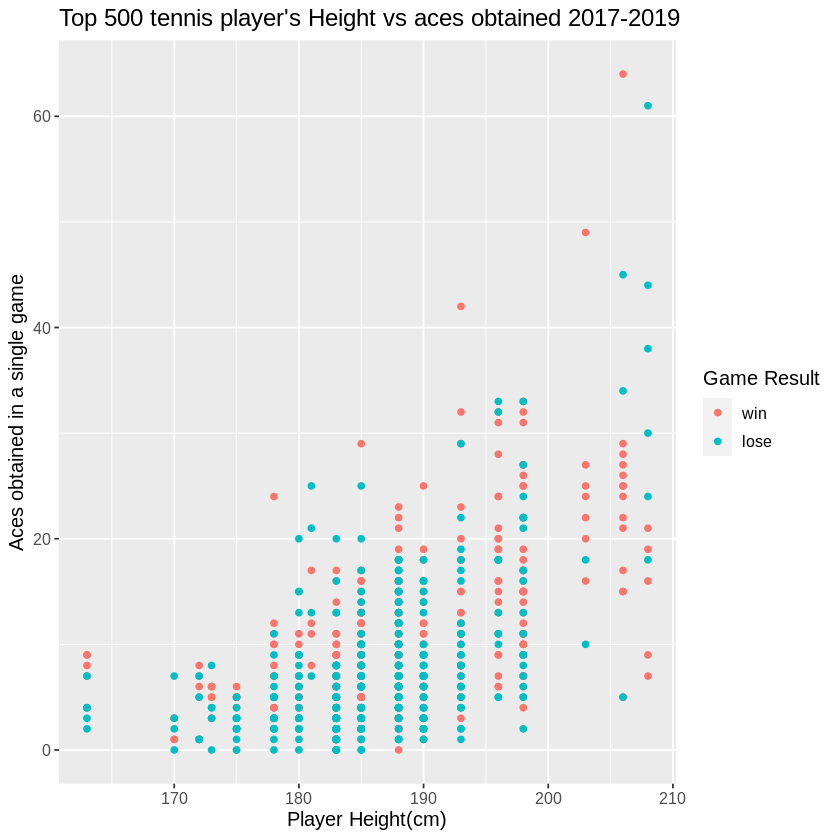

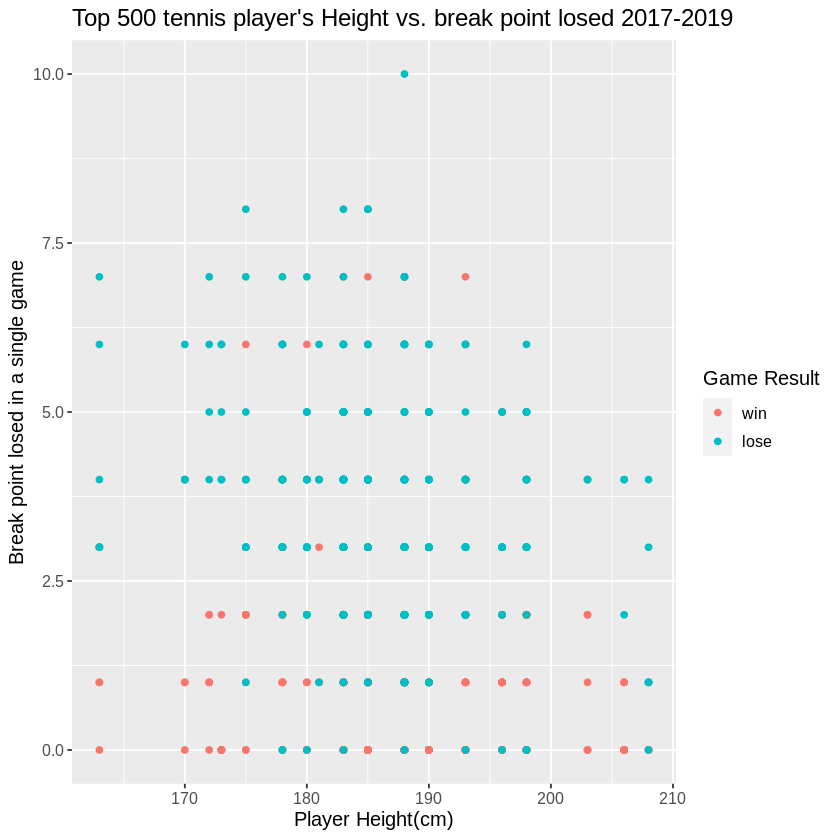

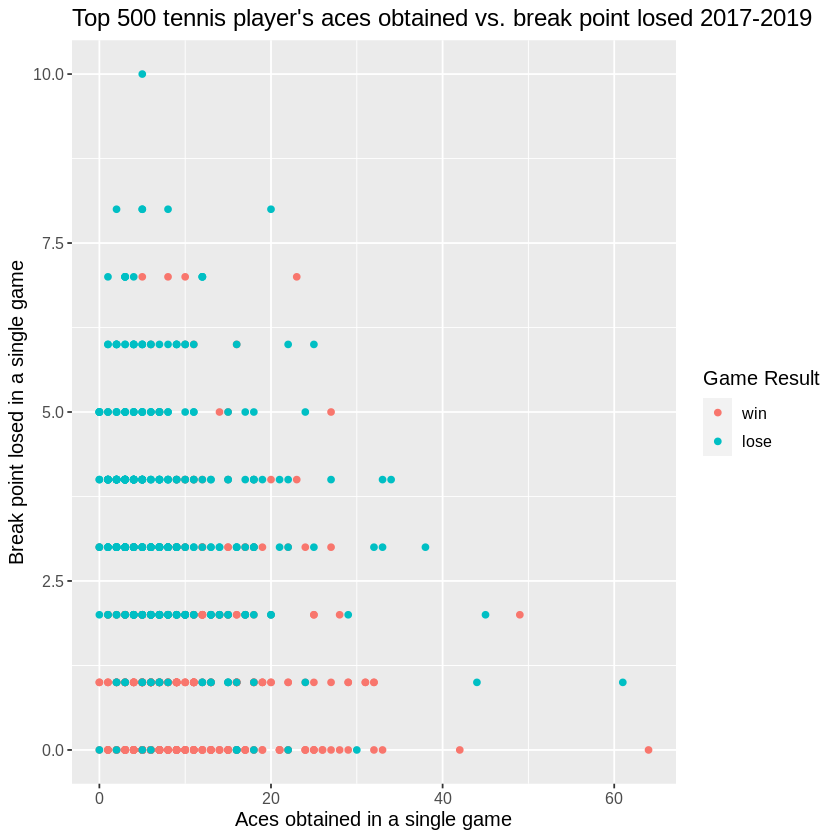

In [6]:
height_ace_plot<- tennis_train%>%
    ggplot(aes(x=height, y=ace, colour=result))+
    geom_point()+
    labs(x="Player Height(cm)", y="Aces obtained in a single game", colour="Game Result")+
    theme(text=element_text(size=12))+
    ggtitle("Top 500 tennis player's Height vs aces obtained 2017-2019")

height_ace_plot


height_bpLosed_plot<-tennis_train%>%
    ggplot(aes(x=height, y=bpLosed, colour=result))+
    geom_point()+
    labs(x="Player Height(cm)", y="Break point losed in a single game", colour="Game Result")+
    theme(text=element_text(size=12))+
    ggtitle("Top 500 tennis player's Height vs. break point losed 2017-2019")

height_bpLosed_plot


aces_bpLosed_plot<-tennis_train%>%
    ggplot(aes(x=ace, y=bpLosed, colour=result))+
    geom_point()+
    labs(x="Aces obtained in a single game", y="Break point losed in a single game", colour="Game Result")+
    theme(text=element_text(size=12))+
    ggtitle("Top 500 tennis player's aces obtained vs. break point losed 2017-2019")

aces_bpLosed_plot

# Methods #

The variables selected are the height of the player, number of aces hit and number of breakpoints lost by the player in a single game. Breakpoint loss (bpLosed) is a new column created by subtracting the two given variables in the data set,  breakpoints faced (bpFaced)and breakpoints saved (bpSaved). 

The relationship between (1)height vs. aces hit, (2)height vs. breakpoint lost and (3)breakpoints lost vs. aces hit will be analyzed. From the summary data shown above, mean height for top 500 players is 187.3cm which is 11 cm taller than world's male's average height according to WHO. Variables chosen based on the assumption that tennis is a sport that favors players with a higher height.  Scatterplot created for the above three relationships will provide whether or not heights have an association of the aces obtained and breakpoint lost in game which have direct relationship to game result. Whether serving more aces and losing less breakpoints have an association with game results can be proven through the third graph. 

A KNN-classification model will be built using standardized data and the decision boundary will be presented on our scatterplot for our graph visualization.


# Expected outcomes and significance #

After our decision boundary is created, finding out what is the minimum amount of aces a player is required to obtain and/or maximum number of breakpoints a player can lose per game, for players with different height to get a winning game result,  is our expected outcome.  

The purpose of our project  is to aid the coach to set training goals for their players with different heights. If  biological differences have a significant impact on game results, additional training is needed. The ability to quantify what’s the target number to reach increase confidence in tennis players which is what we intend to achieve.   

Future studies can be linking the tennis player’s training menu and the effect on increasing aces obtained/ breakpoints lost in a game to our target ace/ breakpoint lost goals.
